In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, shapiro
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [3]:
df = pd.read_csv(r"c:\Users\Arun kumar\Downloads\salary prediction SLR\Salary_dataset.csv")
df




,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [4]:
print("\nDataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes

Missing Values:
Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64


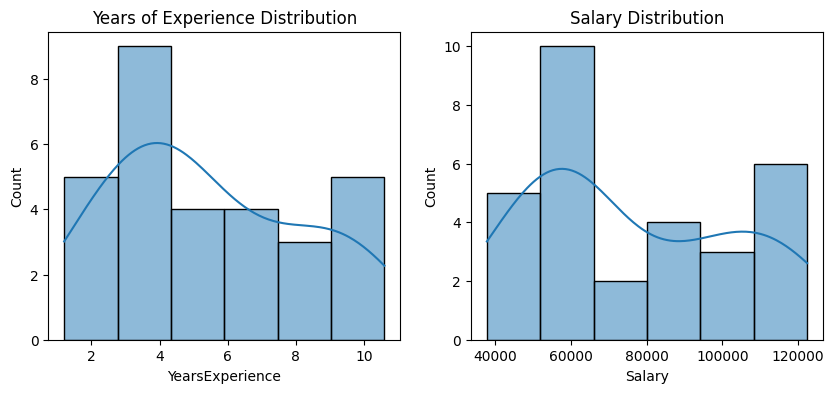

Skewness of YearsExperience: 0.36
Skewness of Salary: 0.34


In [5]:
# Step 4: Distribution & Skewness
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df['YearsExperience'], kde=True)
plt.title("Years of Experience Distribution")

plt.subplot(1,2,2)
sns.histplot(df['Salary'], kde=True)
plt.title("Salary Distribution")
plt.show()

print(f"Skewness of YearsExperience: {skew(df['YearsExperience']):.2f}")
print(f"Skewness of Salary: {skew(df['Salary']):.2f}")

Correlation between YearsExperience and Salary: 0.9782


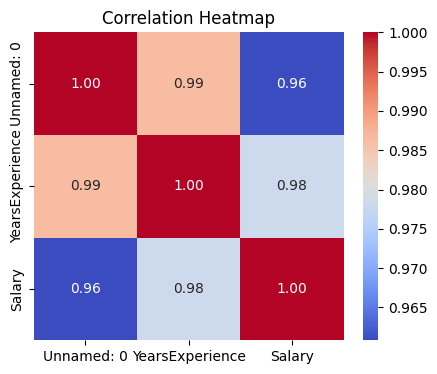

In [6]:
# Correlation Analysis
corr_value = df['YearsExperience'].corr(df['Salary'])
print(f"Correlation between YearsExperience and Salary: {corr_value:.4f}")

plt.figure(figsize=(5,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


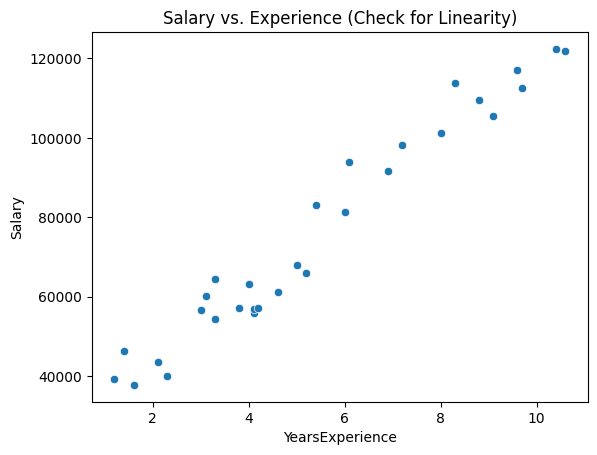

In [7]:
#step5: Scatterplot for Linear Relationship
sns.scatterplot(x='YearsExperience', y='Salary', data=df)
plt.title("Salary vs. Experience (Check for Linearity)")
plt.show()


In [8]:
# Step 6: Fit Linear Regression Model
X = df[['YearsExperience']]
y = df['Salary']

model = LinearRegression()
model.fit(X, y)
y_pred=model.predict(X)

b0 = model.intercept_
b1 = model.coef_[0]
print(f"\nIntercept (b0): {b0:.2f}")
print(f"Slope (b1): {b1:.2f}")

r2=model.score(X,y)
print(f"r2_score:",r2)
mse=mean_squared_error(y,y_pred)
print(f"Mean squared error:",mse)


n = X.shape[0]   # number of observations
k = X.shape[1]   # number of independent variables


adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - k - 1))
print(f"Adjusted R²: {adj_r2:.4f}")
rmse = np.sqrt(mse)
print(f"root mean squared error:",rmse)




Intercept (b0): 24848.20
Slope (b1): 9449.96
r2_score: 0.9569566641435086
Mean squared error: 31270951.722280957
Adjusted R²: 0.9554
root mean squared error: 5592.043608760661


In [9]:
# Step 7: Prediction
predicted_salary = model.predict([[8]])
print(f"Predicted Salary for 8 Years Experience: ₹{predicted_salary[0]:.2f}")

Predicted Salary for 8 Years Experience: ₹100447.90


c:\Users\Arun kumar\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


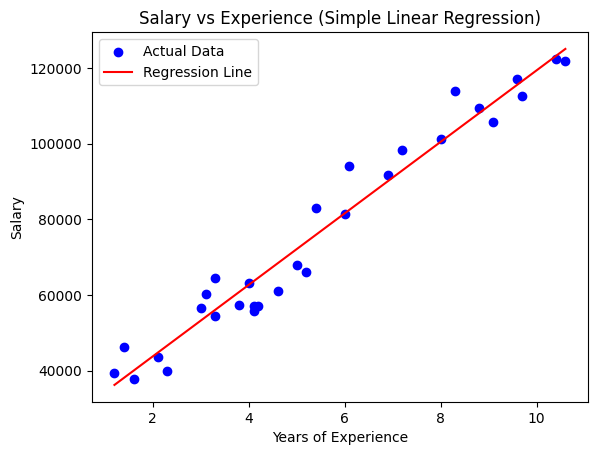

In [10]:
# Step 8: Plot Regression Line
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience (Simple Linear Regression)')
plt.legend()
plt.show()

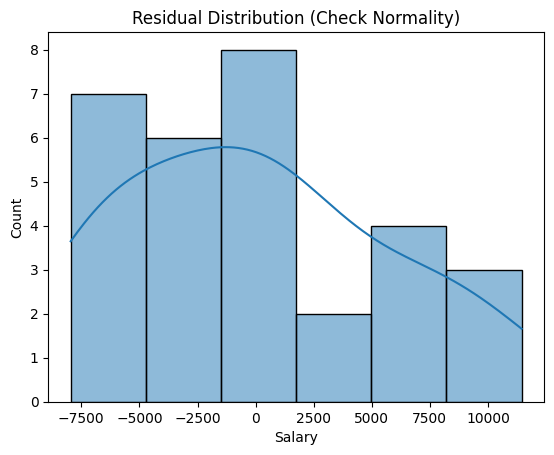

Shapiro-Wilk p-value: 0.1952
 Residuals are approximately normal.


In [11]:
# Step 9: Model Diagnostics
y_pred = model.predict(X)
residuals = y - y_pred

# Normality of Errors 
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution (Check Normality)")
plt.show()

shapiro_test = shapiro(residuals)
print(f"Shapiro-Wilk p-value: {shapiro_test.pvalue:.4f}")
if shapiro_test.pvalue > 0.05:
    print(" Residuals are approximately normal.")
else:
    print(" Residuals deviate from normality.")

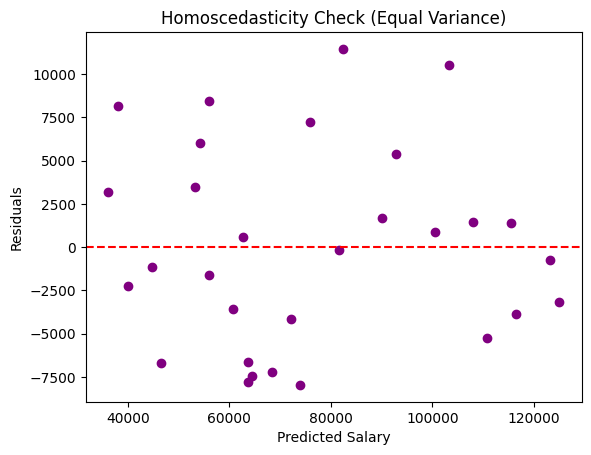

In [12]:
#  Homoscedasticity 
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check (Equal Variance)')
plt.show()

In [13]:
# Independence of Errors (Durbin-Watson) 
X_sm = sm.add_constant(X)
ols_model = sm.OLS(y, X_sm).fit()
dw_stat = sm.stats.stattools.durbin_watson(ols_model.resid)
print(f"Durbin-Watson Statistic: {dw_stat:.2f}")
if 1.5 < dw_stat < 2.5:
    print(" Errors are independent.")
else:
    print(" Possible autocorrelation in errors.")


Durbin-Watson Statistic: 1.65
 Errors are independent.


In [14]:
print("\nModel Summary:")
print(ols_model.summary())


Model Summary:
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 08 Oct 2025   Prob (F-statistic):           1.14e-20
Time:                        18:32:59   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.485e+04